In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style(rc={'font.family': ['sans-serif'],'axis.labelsize': 25})
sns.set_context("notebook")

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.labelsize'] = 18

# Average driving speed against GDP

In this post I will attempt to combine two datasets I have worked on. Firstly the [Average driving speeds by country](https://github.com/ga7g08/GoogleMapsAPI_experiment/blob/master/Results.md) as estimated by Google's location API, and secondly the [GDP by country](https://ga7g08.github.io/2015/05/12/GDP-by-country/) using data from the world bank. 

## Import the data

Firstly we import the data as two separate data frames, this assumes the data exists as per the other posts and also does the cleaning without explanation.

In [7]:
df_GDP = pd.read_csv("../data_sets/GDP_by_Country_WorldBank/ny.gdp.mktp.cd_Indicator_en_csv_v2.csv", 
                 quotechar='"', skiprows=2)
colnames_to_drop = df_GDP.columns[np.array([2, 3, -2, -1])]
for c in colnames_to_drop:
    df_GDP.drop(c, 1, inplace=True)
    
df_GDP = df_GDP[~df_GDP['Country Code'].isnull()]

df_AS = pd.read_csv("AverageSpeedsByCountry.txt", skipinitialspace=True)

### An issue
Unfortunately the two data sets can't be coerced together easily. The reason being that the country codes used in the average speed investigation were taken from [the geonames website](http://www.geonames.org/) which used a two letter code, while the country codes for the GDP used the proper three letter code. Thankfully most of the codes can be matched by simply pairing the first two letters of the 3 letter code (e.g "USA" with "US"), we first create all of these pairs:

In [20]:
pairs = []
for Country in df_AS.Country:
    matches = [Country in CC[:2] for CC in df_GDP['Country Code'].values]
    matched_values = df_GDP['Country Code'][matches].values
    if len(matched_values) == 1:
        pairs.append([Country, matched_values[0]])
    elif len(matched_values) > 1:
        print "For {} I found these matches:".format(Country), " ".join(matched_values)
    else:
        print "No matches found for {}".format(Country)

For CH I found these matches: CHE CHI CHL CHN
For BR I found these matches: BRA BRB BRN
No matches found for TR
For FR I found these matches: FRA FRO
For CA I found these matches: CAF CAN
For AU I found these matches: AUS AUT
For BG I found these matches: BGD BGR
No matches found for GF
No matches found for DK
No matches found for PT
For AR I found these matches: ARB ARE ARG ARM
For ES I found these matches: ESP EST
No matches found for SK
For MD I found these matches: MDA MDG MDV
No matches found for PK
No matches found for MX
For IN I found these matches: IND INX
For BE I found these matches: BEL BEN
For NO I found these matches: NOC NOR


For those with multiple matches, some we can easily add in by hand:

In [21]:
pairs_by_hand = [['BR', 'BRA'],
                 ['CA', 'CAN'],
                 ['FR', 'FRA'],
                 ['AU', 'AUS'],
                 ['AR', 'ARG'],
                 ['IN', 'IND']]

for pair in pairs_by_hand:
    pairs.append(pair)

The rest we will ignore for now.

## Plotting the data
Now we plot the data

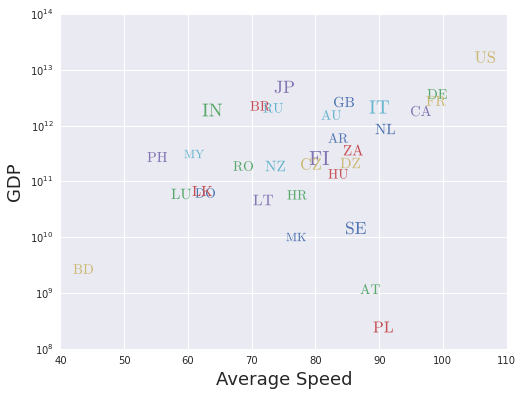

In [40]:
from matplotlib.text import TextPath

ax = plt.subplot(111)

for [AveSpeedCC, GDPCC] in pairs:
    GDP = df_GDP[df_GDP['Country Code'] == GDPCC]['2013'].values[0]
    AveS = df_AS[df_AS.Country == AveSpeedCC].Ave.values
    #ax.scatter(AveS, GDP, c="r", marker=TextPath((0, 0), AveSpeedCC, size=10000), s=1000)
    m = r"$\mathrm{{{}}}$".format(AveSpeedCC)
    ax.plot(AveS, GDP, marker=m, markersize=20)
    
ax.set_yscale("log")
ax.set_ylabel("GDP")
ax.set_xlabel("Average Speed")
plt.show()